In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

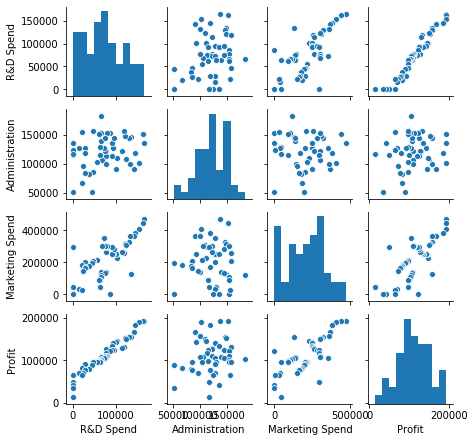

In [6]:
sns.pairplot(data, height=1.5)

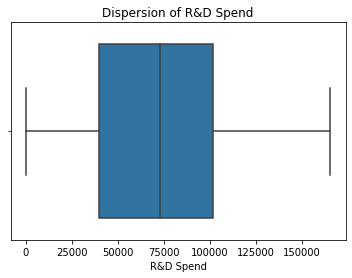

In [32]:
ax = sns.boxplot(data['R&D Spend'])
ax.set_title('Dispersion of R&D Spend')
plt.show(ax)

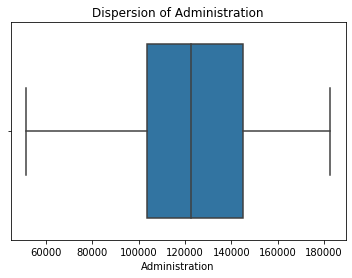

In [33]:
ax = sns.boxplot(data['Administration'])
ax.set_title('Dispersion of Administration')
plt.show(ax)

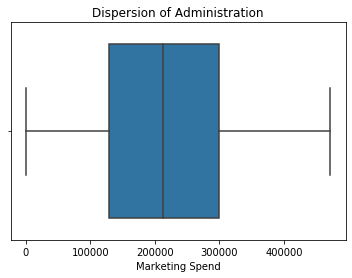

In [34]:
ax = sns.boxplot(data['Marketing Spend'])
ax.set_title("Dispersion of Administration")
plt.show(ax)

No outliers in selected features

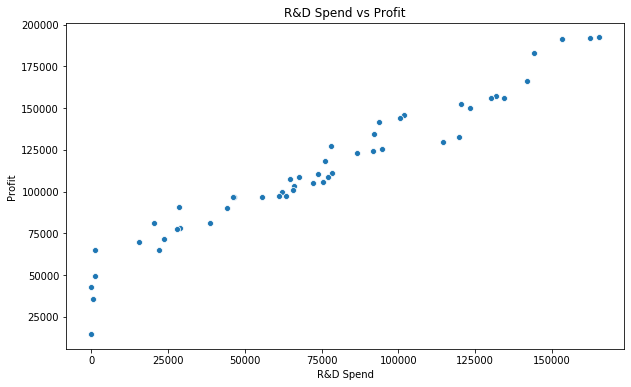

In [36]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x= 'R&D Spend',y='Profit', data=data)
ax = ax.set_title("R&D Spend vs Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show(ax)

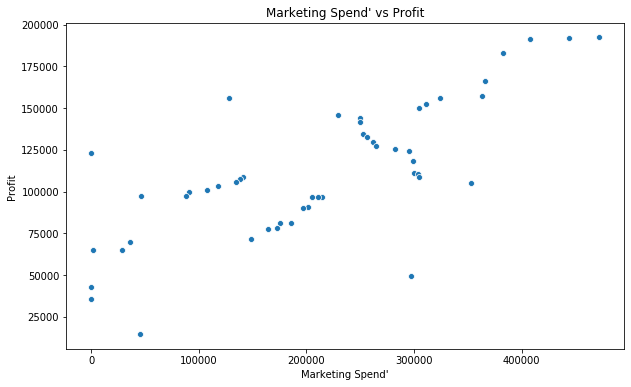

In [37]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x= 'Marketing Spend',y='Profit', data=data)
ax = ax.set_title("Marketing Spend' vs Profit")
plt.xlabel("Marketing Spend'")
plt.ylabel("Profit")
plt.show(ax)

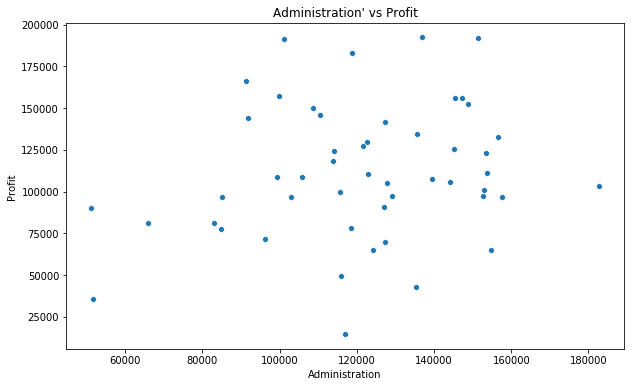

In [38]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x= 'Administration',y='Profit', data=data)
ax = ax.set_title("Administration' vs Profit")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show(ax)

In [8]:
#split the dataset as X  - independent varaibale and y-dependent varaibale

X = data.iloc[:, 0:4]
y = data.iloc[:, -1]

In [9]:
X.head(2)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.80,471784.10,New York
1,162597.7,151377.59,443898.53,California


In [10]:
y.head(2)

0    192261.83
1    191792.06
Name: Profit, dtype: float64

In [11]:
X.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
dtype: object

In [12]:
#Convert the ['state']column into categorical columns

States = pd.get_dummies(X['State'], drop_first=True) # Dummy varaible Trap

In [13]:
# Drop the state coulmn
X=X.drop('State', axis=1)

In [14]:
X=pd.concat([X,States], axis=1)

In [15]:
X.head(2)

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.2,136897.80,471784.10,0,1
1,162597.7,151377.59,443898.53,0,0


In [16]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

In [17]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mul_reg = LinearRegression()

In [18]:
mul_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Predicting the Test set results

y_pred = mul_reg.predict(X_test)

from sklearn.metrics import r2_score
Score = r2_score(y_test, y_pred)

In [20]:
print(Score) 

0.952967609542534


In [21]:
# Make new prediction
new_profit_pred = mul_reg.predict([[165349.2, 136897.80, 471784.10, 0, 1]])
print('The predicted profit is ',new_profit_pred)

The predicted profit is  [191222.25271278]
